<a href="https://colab.research.google.com/github/Mohammad-Shiblu/Practice_on_kaggle_dataset/blob/main/Email_spam_classification/Email_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Email Spam Classification (Comparision between classification model)
The dataset is a csv file containing related information of 5172 randomly picked email files and their respective labels for spam or not-spam classification ( 1 for spam, 0 for not spam).

Different classification methods like naive bayes, logistic regression, SVM, Neural network were applied to this dataset and comaprison between their accuracy and other metrics were monitored.

In [98]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [99]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Email_spam_classification/data/emails.csv")

df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,e,...,ellis,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,15,141,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,10,79,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,10,71,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [100]:
df.shape

(5172, 3002)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [102]:
pd.set_option("display.max_columns", 85)

In [103]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,e,...,ellis,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,15,141,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,10,79,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,10,71,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [104]:
df["Prediction"].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

<Axes: >

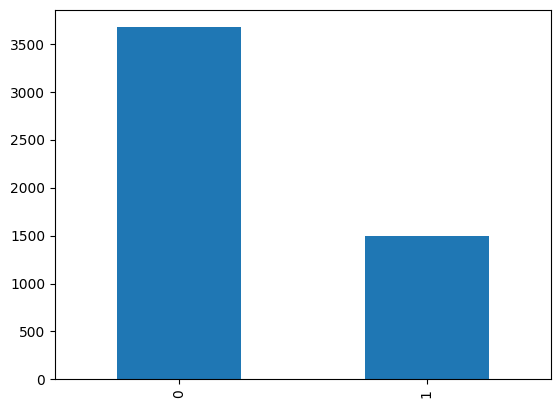

In [105]:
# Checking the no of samoles for each class
df["Prediction"].value_counts().plot(kind="bar")

In [106]:
df.isnull().values.any()

False

In [107]:
# Extracting input features and labels from the data set
X = df.iloc[:, 1:3001]
y = df.iloc[:, 3001]

X.shape, y.shape

((5172, 3000), (5172,))

## Train Test split

In [108]:
# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(4137, 4137, 1035, 1035)

In [109]:
# function to calculate the metrices for the model
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score
def evaluation_metrics(y_pred, y_label):
  print(f"Accuracy: {accuracy_score(y_label, y_pred): .4f}")
  print(f"Recall  : {recall_score(y_label, y_pred): .2f}")
  print(f"f1_score  : {f1_score(y_label, y_pred): .2f}")
  print(f"ROC AUC Score: {roc_auc_score(y_label, y_pred): .2f}")

## Naive Bayes classifier (Multinomial)

In [110]:
# Multinomial Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

Mnb = MultinomialNB()
y_Mnb = Mnb.fit(X_train, y_train).predict(X_test)

print("Evaluation metrics for Multinomial naive bayes ->")
evaluation_metrics(y_Mnb, y_test)


Evaluation metrics for Multinomial naive bayes ->
Accuracy:  0.9546
Recall  :  0.96
f1_score  :  0.92
ROC AUC Score:  0.96


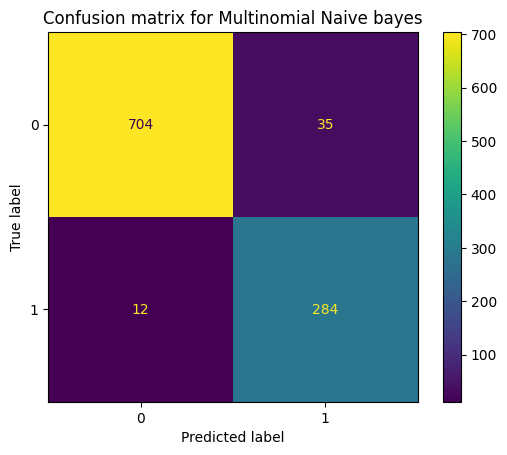

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(Mnb, X_test, y_test)
plt.title("Confusion matrix for Multinomial Naive bayes")
plt.show()


## Gaussian Naive Bayes


Evaluation metrics for Gaussian Naive Bayes-> 
Accuracy:  0.9478
Recall  :  0.96
f1_score  :  0.91
ROC AUC Score:  0.95


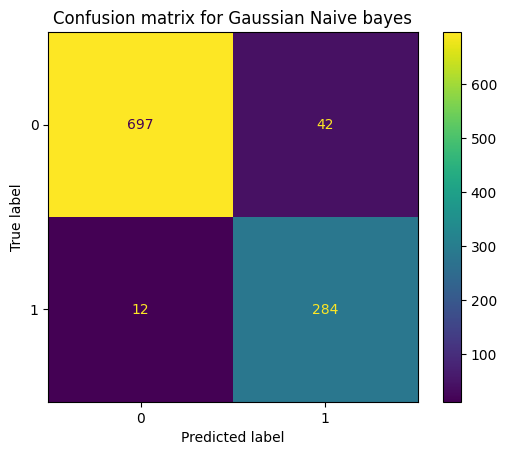

In [112]:
from sklearn.naive_bayes import GaussianNB

Gnb = GaussianNB()

y_gnb = Gnb.fit(X_train, y_train).predict(X_test)
print("Evaluation metrics for Gaussian Naive Bayes-> ")
evaluation_metrics(y_gnb, y_test)

ConfusionMatrixDisplay.from_estimator(Gnb, X_test, y_test)
plt.title("Confusion matrix for Gaussian Naive bayes")
plt.show()

## Logistic Regression

Evaluation metrics for Logistic regression-> 
Accuracy:  0.9720
Recall  :  0.96
f1_score  :  0.95
ROC AUC Score:  0.97


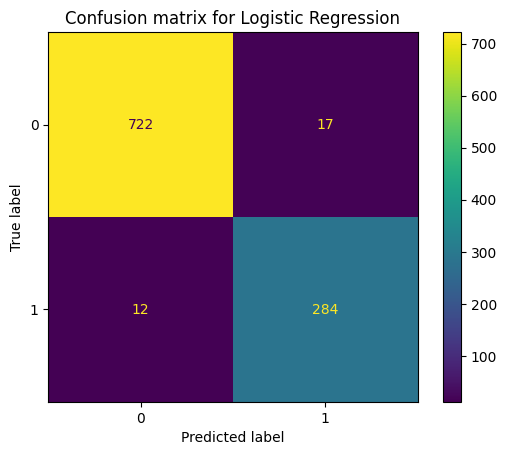

In [113]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000)

y_lr = logistic_regression.fit(X_train, y_train).predict(X_test)
print("Evaluation metrics for Logistic regression-> ")
evaluation_metrics(y_lr, y_test)

ConfusionMatrixDisplay.from_estimator(logistic_regression, X_test, y_test)
plt.title("Confusion matrix for Logistic Regression")
plt.show()

## Support Vector Machine

SVMs are influenced by imbalanced dataset. After the weight balance, there was a significant improvement over the accuracy.

Also the input data were normalized to check the effect but there was not much improvement. Different Kernel functions were tried, but got the best result for linear kernal.

Evaluation metrics for SVM-> 
Accuracy:  0.8174
Recall  :  0.40
f1_score  :  0.56
ROC AUC Score:  0.69


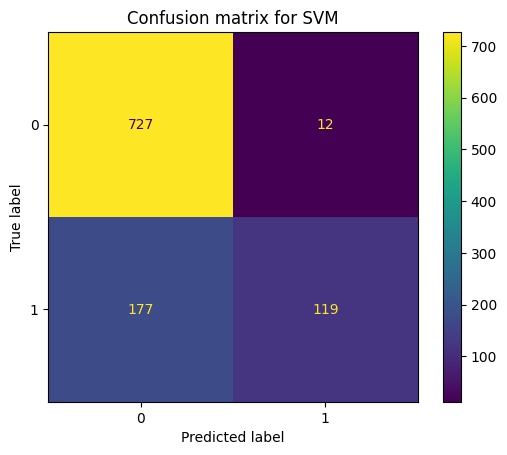

In [114]:
from sklearn import svm

svm_cl = svm.SVC()
y_svm = svm_cl.fit(X_train, y_train).predict(X_test)
print("Evaluation metrics for SVM-> ")
evaluation_metrics(y_svm, y_test)

ConfusionMatrixDisplay.from_estimator(svm_cl, X_test, y_test)
plt.title("Confusion matrix for SVM")
plt.show()

Evaluation metrics for SVM(after weight balance)-> 
Accuracy:  0.9594
Recall  :  0.94
f1_score  :  0.93
ROC AUC Score:  0.95


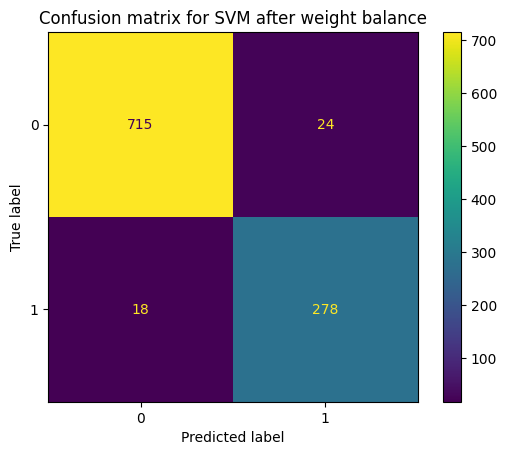

In [147]:
# SVM classification weight balance for unbalanced dataset
class_weights = {0: 1, 1: 2}
svm_cl_1 = svm.SVC(kernel="linear", class_weight=class_weights)
y_svm_1 = svm_cl_1.fit(X_train, y_train).predict(X_test)
print("Evaluation metrics for SVM(after weight balance)-> ")
evaluation_metrics(y_svm_1, y_test)

ConfusionMatrixDisplay.from_estimator(svm_cl_1, X_test, y_test)
plt.title("Confusion matrix for SVM after weight balance")
plt.show()

Evaluation metrics for SVM (Normalized)-> 
Accuracy:  0.9469
Recall  :  0.92
f1_score  :  0.91
ROC AUC Score:  0.94


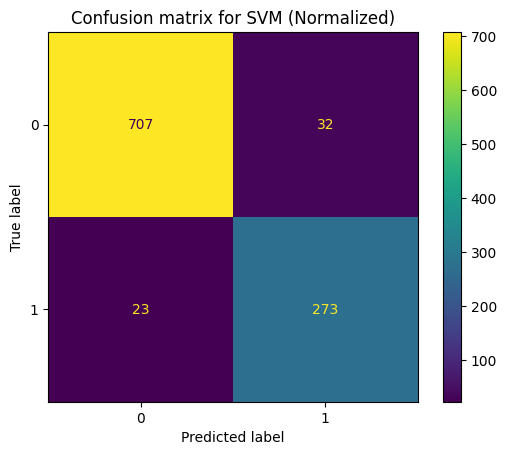

In [148]:
# Normalizing the label
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


class_weights = {0: 1, 1: 2}
svm_cl_2 = make_pipeline(StandardScaler() ,svm.SVC(kernel="linear", class_weight=class_weights))
y_svm_2 = svm_cl_2.fit(X_train, y_train).predict(X_test)
print("Evaluation metrics for SVM (Normalized)-> ")
evaluation_metrics(y_svm_2, y_test)

ConfusionMatrixDisplay.from_estimator(svm_cl_2, X_test, y_test)
plt.title("Confusion matrix for SVM (Normalized)")
plt.show()

Evaluation metrics for SVM-> 
Accuracy:  0.7643
Recall  :  0.20
f1_score  :  0.33
ROC AUC Score:  0.59


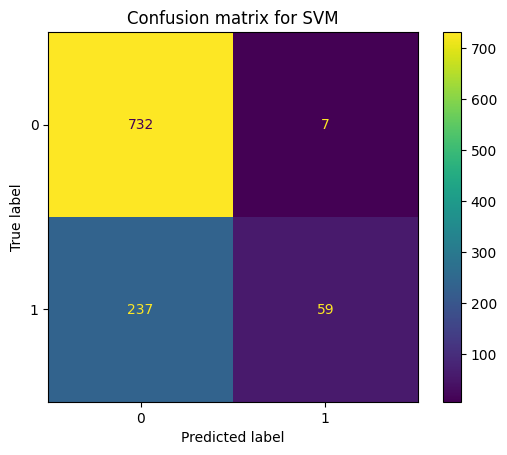

In [117]:
# SVM classification weight balance for unbalanced dataset
class_weights = {0: 1, 1: 2}
svm_cl_3 = svm.SVC(kernel="poly", class_weight=class_weights)
y_svm_3 = svm_cl_3.fit(X_train, y_train).predict(X_test)
print("Evaluation metrics for SVM-> ")
evaluation_metrics(y_svm_3, y_test)

ConfusionMatrixDisplay.from_estimator(svm_cl_3, X_test, y_test)
plt.title("Confusion matrix for SVM")
plt.show()

## Neural Network

Neural network with only 2 Linear layer and with non linear layer were tried. For linear layer with 20 hidden neurons got the best results. for non linear NN, it was not training at all.

In [139]:
import torch
from torch import nn

class SpamEmailV0(nn.Module):
    def __init__(self, n_in, n_out, n_h):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(n_in, n_h),
            nn.Linear(n_h, n_out)
        )

    def forward(self, x):
        return self.layer_stack(x)

model_0 = SpamEmailV0(3000, 1, 20)

model_0

SpamEmailV0(
  (layer_stack): Sequential(
    (0): Linear(in_features=3000, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [140]:
# setup a loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr =0.1)

In [141]:
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=2)


In [142]:
import torch
import numpy as np


X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float)
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float)




In [143]:
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train_tensor).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train_tensor)
  acc = acc_fn(y_preds, y_train_tensor)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model_0(X_test_tensor).squeeze()
    # Turn the test logits into prediction labels
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test_tensor)
    test_acc = acc_fn(test_preds, y_test_tensor)
  # Print out what's happening every 100 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.1178, Acc: 0.30% | Test Loss: 73.5332, Test Acc: 0.71%
Epoch: 10 | Loss: 8.0627, Acc: 0.61% | Test Loss: 0.2324, Test Acc: 0.96%
Epoch: 20 | Loss: 1.7979, Acc: 0.86% | Test Loss: 1.2941, Test Acc: 0.90%
Epoch: 30 | Loss: 0.2936, Acc: 0.95% | Test Loss: 0.6986, Test Acc: 0.94%
Epoch: 40 | Loss: 0.1900, Acc: 0.97% | Test Loss: 0.4455, Test Acc: 0.97%
Epoch: 50 | Loss: 0.0845, Acc: 0.98% | Test Loss: 0.2855, Test Acc: 0.97%
Epoch: 60 | Loss: 0.0402, Acc: 0.99% | Test Loss: 0.2943, Test Acc: 0.98%
Epoch: 70 | Loss: 0.0252, Acc: 0.99% | Test Loss: 0.2474, Test Acc: 0.98%
Epoch: 80 | Loss: 0.0194, Acc: 0.99% | Test Loss: 0.2405, Test Acc: 0.98%
Epoch: 90 | Loss: 0.0158, Acc: 1.00% | Test Loss: 0.2774, Test Acc: 0.98%


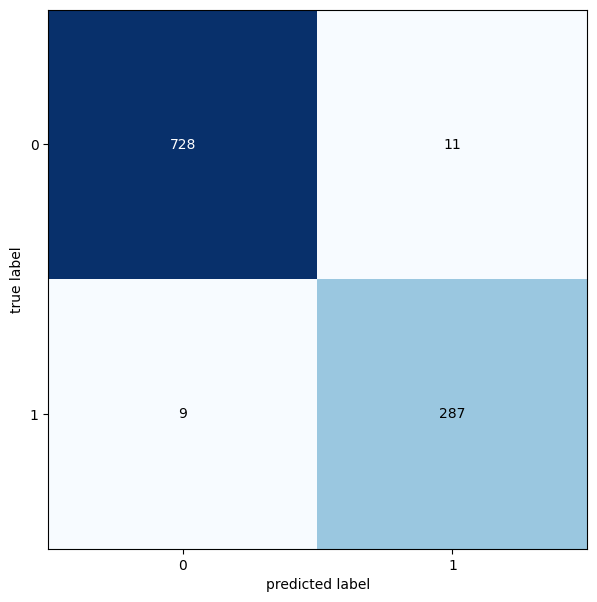

In [144]:
model_0.eval()

with torch.inference_mode():
  y_test_logits = model_0(X_test_tensor).squeeze()
  y_test_preds = torch.round(torch.sigmoid(y_test_logits))

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=2, task='multiclass')
confmat_tensor = confmat(preds=y_test_preds,
                         target=y_test_tensor)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib work with numpy
    figsize=(10, 7)
)

In [145]:
# Introducing non linearity into our neural network layer
import torch
from torch import nn

class SpamEmailV1(nn.Module):
    def __init__(self, n_in, n_out, n_h):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(n_in, n_h),
            nn.Linear(n_h, n_out),
            nn.ReLU()

        )

    def forward(self, x):
        return self.layer_stack(x)

model_1 = SpamEmailV1(3000, 1, 20)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(), lr =0.1)

torch.manual_seed(42)
epochs = 100
for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train_tensor).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train_tensor)
  acc = acc_fn(y_preds, y_train_tensor)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model_1(X_test_tensor).squeeze()
    # Turn the test logits into prediction labels
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test_tensor)
    test_acc = acc_fn(test_preds, y_test_tensor)
  # Print out what's happening every 100 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.1179, Acc: 0.30% | Test Loss: 0.6931, Test Acc: 0.71%
Epoch: 10 | Loss: 0.6931, Acc: 0.71% | Test Loss: 0.6931, Test Acc: 0.71%
Epoch: 20 | Loss: 0.6931, Acc: 0.71% | Test Loss: 0.6931, Test Acc: 0.71%
Epoch: 30 | Loss: 0.6931, Acc: 0.71% | Test Loss: 0.6931, Test Acc: 0.71%
Epoch: 40 | Loss: 0.6931, Acc: 0.71% | Test Loss: 0.6931, Test Acc: 0.71%
Epoch: 50 | Loss: 0.6931, Acc: 0.71% | Test Loss: 0.6931, Test Acc: 0.71%
Epoch: 60 | Loss: 0.6931, Acc: 0.71% | Test Loss: 0.6931, Test Acc: 0.71%
Epoch: 70 | Loss: 0.6931, Acc: 0.71% | Test Loss: 0.6931, Test Acc: 0.71%
Epoch: 80 | Loss: 0.6931, Acc: 0.71% | Test Loss: 0.6931, Test Acc: 0.71%
Epoch: 90 | Loss: 0.6931, Acc: 0.71% | Test Loss: 0.6931, Test Acc: 0.71%


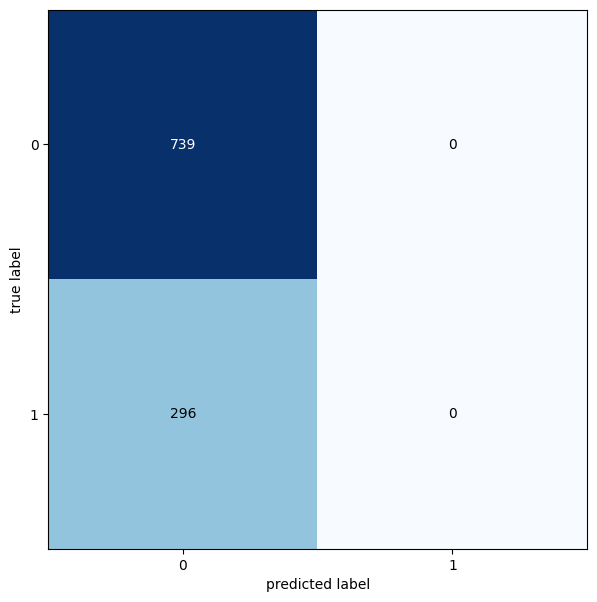

In [146]:
model_1.eval()

with torch.inference_mode():
  y_test_logits = model_1(X_test_tensor).squeeze()
  y_test_preds = torch.round(torch.sigmoid(y_test_logits))

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=2, task='multiclass')
confmat_tensor = confmat(preds=y_test_preds,
                         target=y_test_tensor)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib work with numpy
    figsize=(10, 7)
)

Overall for this dataset Neural network got the best accuracy closely followed by logistic regression. for SVM(wighted) and naive bayes (MUltinomial) almost similar result.